In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

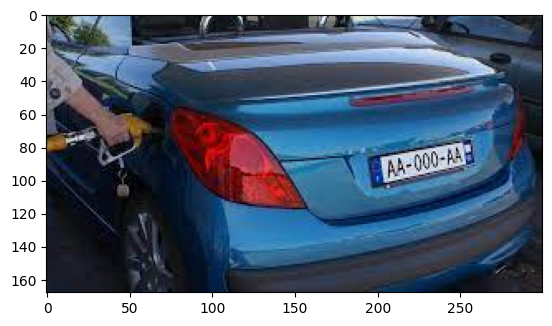

In [43]:
# Charger l'image
image = cv2.imread("image.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


In [44]:
# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer un filtre flou gaussien
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# Trouver les contours dans l'image
edged = cv2.Canny(blurred, 30, 150)
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Identifier la plaque d'immatriculation
plate_contours = []
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    aspect_ratio = w / float(h)
    if 3 < aspect_ratio < 6 and w > 100 and h > 25:
        plate_contours.append(contour)
        
# Extraire la zone de la plaque d'immatriculation et flouter les caractères
for contour in plate_contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 0), -1)

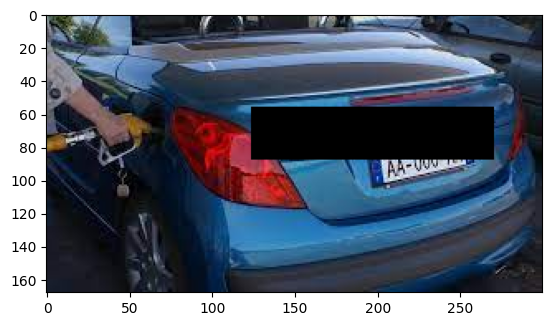

In [45]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()